In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import os
import scipy.stats as sps
from itertools import cycle

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join('data', 'mouse_drug_data.csv')
clinical_trial_data_to_load = os.path.join('data', 'clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = mouse_df.merge(clinical_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [19]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_volume = combined_df.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
mean_volume = mean_volume.drop(columns='Metastatic Sites')
# Preview DataFrame
mean_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [20]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume_group = combined_df.groupby(['Drug','Timepoint'])
sem_volume = sem_volume_group.sem(ddof=1)
# Convert to DataFrame
sem_volume = sem_volume.drop(columns=['Mouse ID', 'Metastatic Sites'])
# Preview DataFrame
sem_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [21]:
# Minor Data Munging to Re-Format the Data Frames
mean_volume.reset_index(inplace=True)
sem_volume.reset_index(inplace=True)
mean_volume_reformat = mean_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_volume_reformat = sem_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_volume_reformat.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [76]:
sem_volume_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


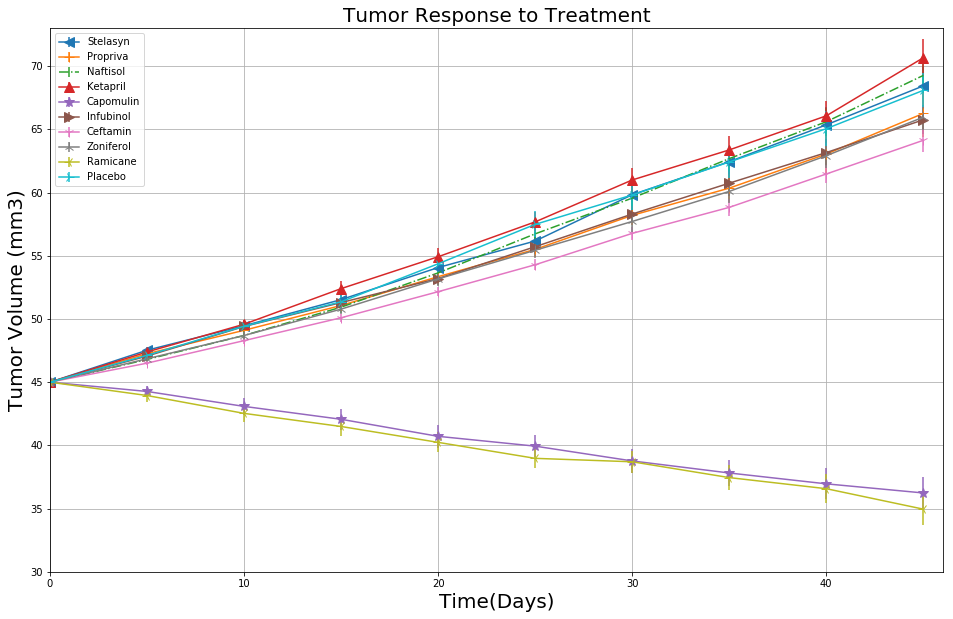

In [23]:
# Generate the Plot (with Error Bars)
fig = plt.figure(figsize=(16,10))
x = combined_df['Timepoint'].unique()
markers = ['<', '+', '.', '^', '*', '>', '1', '2', '3', '4']
mcyc = cycle(markers)
legend = []
for drug in combined_df['Drug'].unique():
    plt.errorbar(x, mean_volume_reformat[drug], sem_volume_reformat[drug], fmt='-' + next(mcyc), markersize=10)
    legend.append(drug)
plt.legend(legend, loc='upper left')
plt.grid()
plt.xlim(0,46)
plt.ylim(30,73)
plt.xlabel('Time(Days)', fontsize=20)
plt.ylabel('Tumor Volume (mm3)', fontsize=20)
plt.title('Tumor Response to Treatment', fontsize=20)
# Save the Figure
create = os.path.join('Output')
if not os.path.exists(create):    
    os.makedirs(create)
save_fig = os.path.join('Output','TumorResponseFig.png')
plt.savefig(save_fig, orientation='landscape')
plt.show()

## Metastatic Response to Treatment

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_site = combined_df.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
mean_site = mean_site.drop(columns='Tumor Volume (mm3)')
# Preview DataFrame
mean_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_site_group = combined_df.groupby(['Drug','Timepoint'])
sem_site = sem_site_group.sem(ddof=1)
# Convert to DataFrame
sem_site = sem_site.drop(columns=['Mouse ID', 'Tumor Volume (mm3)'])
# Preview DataFrame
sem_site.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [72]:
# Minor Data Munging to Re-Format the Data Frames
mean_site.reset_index(inplace=True)
sem_site.reset_index(inplace=True)
mean_site_reformat = mean_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
sem_site_reformat = sem_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
mean_site_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [74]:
sem_site_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


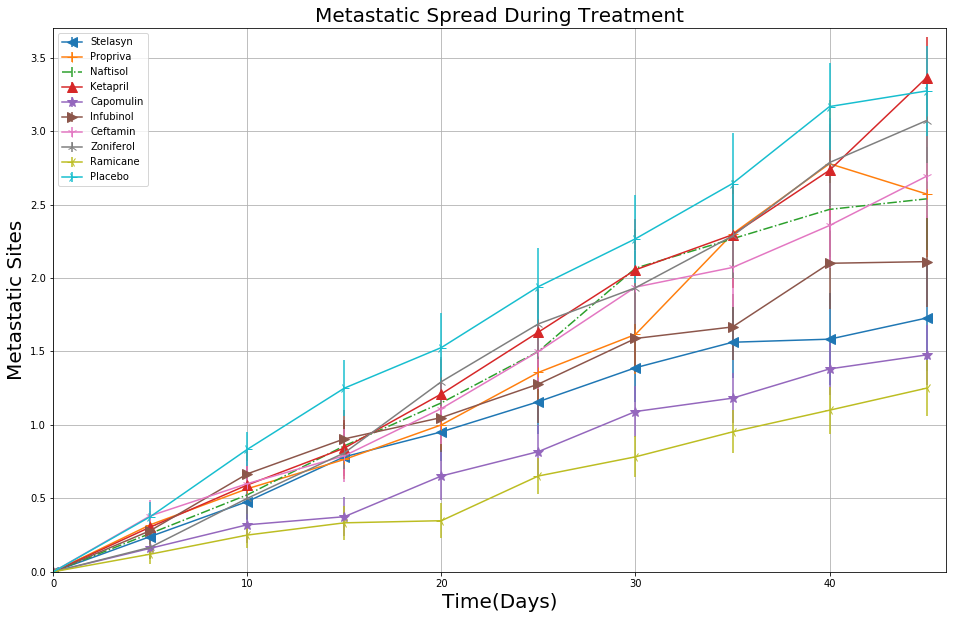

In [28]:
# Generate the Plot (with Error Bars)
fig = plt.figure(figsize=(16,10))
x = combined_df['Timepoint'].unique()
markers = ['<', '+', '.', '^', '*', '>', '1', '2', '3', '4']
mcyc = cycle(markers)
legend = []
for drug in combined_df['Drug'].unique():
    plt.errorbar(x, mean_site_reformat[drug], sem_site_reformat[drug], fmt='-' + next(mcyc), markersize=10)
    legend.append(drug)
plt.legend(legend, loc='upper left')
plt.grid()
plt.xlim(0,46)
plt.ylim(0,3.7)
plt.xlabel('Time(Days)', fontsize=20)
plt.ylabel('Metastatic Sites', fontsize=20)
plt.title('Metastatic Spread During Treatment', fontsize=20)
# Save the Figure
create = os.path.join('Output')
if not os.path.exists(create):    
    os.makedirs(create)
save_fig = os.path.join('Output','MetastaticSpreadFig.png')
plt.savefig(save_fig, orientation='landscape')
plt.show()

## Survival Rates

In [29]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined_df.groupby(['Drug','Timepoint']).count()
# Convert to DataFrame
count_mice = count_mice.drop(columns=['Tumor Volume (mm3)','Metastatic Sites'])
count_mice = count_mice.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
count_mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [70]:
# Minor Data Munging to Re-Format the Data Frames
count_mice.reset_index(inplace=True)
count_mice_reformat = count_mice.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
for column in count_mice_reformat.columns:
    count_mice_reformat[column] = count_mice_reformat[column]/count_mice_reformat[column].max()*100
# Preview the Data Frame
count_mice_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


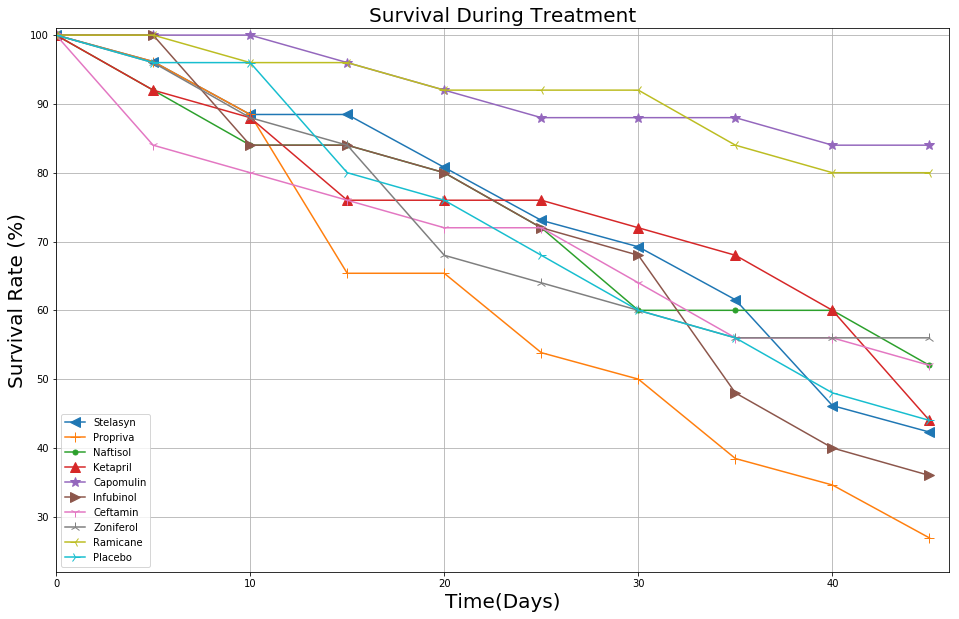

In [31]:
# Generate the Plot (with Error Bars)
fig = plt.figure(figsize=(16,10))
x = combined_df['Timepoint'].unique()
markers = ['<', '+', '.', '^', '*', '>', '1', '2', '3', '4']
mcyc = cycle(markers)
legend = []
for drug in combined_df['Drug'].unique():
    plt.plot(x, count_mice_reformat[drug], marker=next(mcyc), markersize=10)
    legend.append(drug)
plt.legend(legend, loc='lower left')
plt.grid()
plt.xlim(0,46)
plt.ylim(22,101)
plt.xlabel('Time(Days)', fontsize=20)
plt.ylabel('Survival Rate (%)', fontsize=20)
plt.title('Survival During Treatment', fontsize=20)
# Save the Figure
create = os.path.join('Output')
if not os.path.exists(create):    
    os.makedirs(create)
save_fig = os.path.join('Output','SurvivalFig.png')
plt.savefig(save_fig, orientation='landscape')
plt.show()

## Summary Bar Graph

In [32]:
# Calculate the percent changes for each drug
percent_change = pd.Series()
for column in mean_volume_reformat.columns:
    percent_change[column] = (mean_volume_reformat.loc[45,column] - mean_volume_reformat.loc[0,column])/45*100

# Move placebo to end of dataset to allow for easier comparisons to control
target_row = pd.Series()
target_row[percent_change.index[5]] = percent_change[5]
percent_change = percent_change.drop(percent_change.index[5])
percent_change = percent_change.append(target_row)
    
# Display the data to confirm
percent_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Placebo      51.297960
dtype: float64

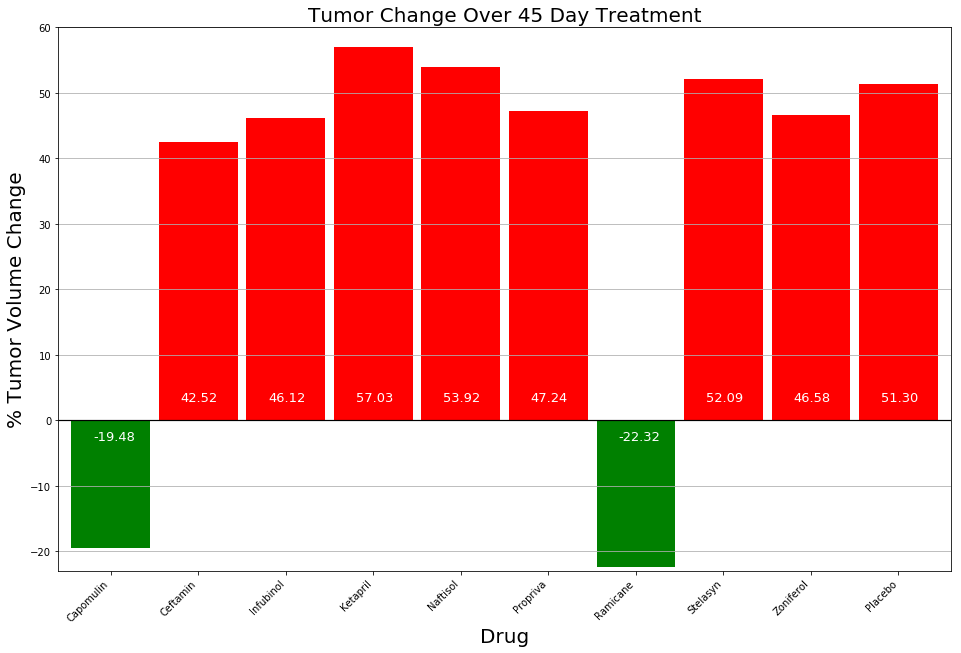

In [33]:
# Store colors to use based on percent changes
colors = []
for x in percent_change:
    if x > 0:
        colors.append('r')
    else:
        colors.append('g')

# Store locations for x-ticks        
x_loc = np.arange(0,len(percent_change))

# Make figure and set size
fig = plt.figure(figsize=(16,10))

# Make plot and configure
ax = percent_change.plot(x='Drug', y='% Tumor Volume Change', kind='bar', colors=colors, width=0.9)

# Format chart
plt.xlabel('Drug', fontsize=20)
plt.ylabel('% Tumor Volume Change', fontsize=20)
plt.title('Tumor Change Over 45 Day Treatment', fontsize=20)
plt.xlim(-0.6, 9.6)
plt.ylim(-23,60)
plt.xticks(x_loc, percent_change.index, rotation=45, ha='right')
plt.grid(axis='y', zorder=0)
plt.hlines(0, -0.6, 9.6, alpha=1, linewidth=1.2)

# Add annotations of heights to each bar
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.25, ((3 * abs(p.get_height()))/p.get_height())), color='white', fontsize=13)

# Save the Figure
create = os.path.join('Output')
if not os.path.exists(create):    
    os.makedirs(create)
save_fig = os.path.join('Output','PercentChangeInTumorsFig.png')
plt.savefig(save_fig, orientation='landscape')

# Show the Figure
fig.show()

In [66]:
# Students T-test to analyze results
np.mean()
np.mean()
np.median()
np.median()
np.var()
np.var()
sps.ttest_ind()

TypeError: mean() missing 1 required positional argument: 'a'